#### Reading files with Pandas

In [ ]:
import pandas as pd

In [ ]:
# reading csv file
df = pd.read_csv('data.csv')
df

In [ ]:
# reading text file
df = pd.read_table('data.txt')

#  method 2
df = pd.read_csv('data.txt', sep='\t')

In [ ]:
# reading json file
df = pd.read_json('data.json')

In [ ]:
# reading excel file
df = pd.read_excel('data.xlsx', sheet_name='Sheet1')

In [ ]:
# Altering how data is displayed in pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500) 

##### Filtering and Ordering in Pandas

In [ ]:
df = pd.read_csv('Hockey_teams.csv')
df.head()

In [ ]:
df[df['Year'] > 2000]

In [ ]:
df[df['Wins'] > 50]

In [ ]:
df[df['Year'].isin([1990, 2000, 2010])]

In [ ]:
df = df.set_index('Team Name')
df.head()

In [ ]:
df.filter(items=['Wins', 'Losses']).head()

In [ ]:
df.filter(like='Boston Bruins', axis=0)

In [ ]:
df.loc['Boston Bruins']

In [ ]:
df.iloc[3]

In [ ]:
df[df['Wins'] <20].sort_values(by=['Wins','Team Name'], ascending=[False, True])

#### Indexing

In [ ]:
df.reset_index(inplace=True)
df.head()

In [ ]:
df.set_index(['Year', 'Team Name'], inplace=True)
df.head()

In [ ]:
df.sort_index()

In [ ]:
df.filter(like='2000', axis=0)

In [ ]:
df.loc[2000, 'Boston Bruins']

In [ ]:
df.iloc[3]

#### Group by and Aggregate functions

In [ ]:
df = pd.read_csv('../Excel_refresher\Sales.csv')
df

In [ ]:
df.groupby('Product_Category')[['Unit_Price', 'Profit', 'Cost', 'Revenue']].mean()

In [ ]:
df.groupby('Product_Category')['Order_Quantity'].max()

In [ ]:
df.groupby('Product_Category')['Cost'].min()

In [ ]:
df.groupby('Product_Category')[['Unit_Price', 'Profit', 'Cost', 'Revenue']].sum()

In [ ]:
df.groupby('Product_Category').agg({'Unit_Price': 'mean', 'Profit': 'sum', 'Cost': 'min', 'Revenue': 'max'})

In [ ]:
df.groupby('Country').agg({'Unit_Price': 'mean', 'Profit': 'sum', 'Cost': 'min', 'Revenue': 'max'})

In [ ]:
df.groupby('Country').describe()

#### Merge, Join, and Concatenate dataframes

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('LOTR.csv')
df

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [4]:
df1 = pd.read_csv('LOTR 2.csv')
df1

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


In [ ]:
# Merging without passing any parameters (inner join by default)
pd.merge(df, df1)

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [ ]:
# Specifying the type of join (inner join)
pd.merge(df, df1, how='inner')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [ ]:
# Creates a suffix for overlapping columns
pd.merge(df, df1, how='inner', on='FellowshipID')

,FellowshipID,FirstName_x,Skills,FirstName_y,Age
0,1001,Frodo,Hiding,Frodo,50
1,1002,Samwise,Gardening,Samwise,39


In [ ]:
# Similar to default inner join (without specifying parameters)
pd.merge(df, df1, how='inner', on=['FellowshipID', 'FirstName'])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [ ]:
# Outer join
pd.merge(df, df1, how='outer')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


In [11]:
# left join
df.merge(df1, how='left')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN


In [12]:
# right join
df.merge(df1, how='right')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39
2,1006,Legolas,NaN,2931
3,1007,Elrond,NaN,6520
4,1008,Barromir,NaN,51


In [13]:
# cross join
df.merge(df1, how='cross')

,FellowshipID_x,FirstName_x,Skills,FellowshipID_y,FirstName_y,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1001,Frodo,Hiding,1002,Samwise,39
2,1001,Frodo,Hiding,1006,Legolas,2931
3,1001,Frodo,Hiding,1007,Elrond,6520
4,1001,Frodo,Hiding,1008,Barromir,51
5,1002,Samwise,Gardening,1001,Frodo,50
6,1002,Samwise,Gardening,1002,Samwise,39
7,1002,Samwise,Gardening,1006,Legolas,2931
8,1002,Samwise,Gardening,1007,Elrond,6520
9,1002,Samwise,Gardening,1008,Barromir,51


In [17]:
df.join(df1, on='FellowshipID', how='outer', lsuffix='_left', rsuffix='_right')

,FellowshipID,FellowshipID_left,FirstName_left,Skills,FellowshipID_right,FirstName_right,Age
NaN,0,NaN,NaN,NaN,1001.0,Frodo,50.0
NaN,1,NaN,NaN,NaN,1002.0,Samwise,39.0
NaN,2,NaN,NaN,NaN,1006.0,Legolas,2931.0
NaN,3,NaN,NaN,NaN,1007.0,Elrond,6520.0
NaN,4,NaN,NaN,NaN,1008.0,Barromir,51.0
0.0,1001,1001.0,Frodo,Hiding,NaN,NaN,NaN
1.0,1002,1002.0,Samwise,Gardening,NaN,NaN,NaN
2.0,1003,1003.0,Gandalf,Spells,NaN,NaN,NaN
3.0,1004,1004.0,Pippin,Fireworks,NaN,NaN,NaN


In [21]:
df3 = df.set_index('FellowshipID').join(df1.set_index('FellowshipID'), lsuffix='_left', rsuffix='_right', how='outer')
df3

,FirstName_left,Skills,FirstName_right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN
1006,NaN,NaN,Legolas,2931.0
1007,NaN,NaN,Elrond,6520.0
1008,NaN,NaN,Barromir,51.0


In [22]:
pd.concat([df,df1])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [23]:
pd.concat([df,df1], join='inner')

,FellowshipID,FirstName
0,1001,Frodo
1,1002,Samwise
2,1003,Gandalf
3,1004,Pippin
0,1001,Frodo
1,1002,Samwise
2,1006,Legolas
3,1007,Elrond
4,1008,Barromir


In [ ]:
pd.concat([df,df1], join='outer', axis=1)

,FellowshipID,FirstName,Skills,FellowshipID,FirstName,Age
0,1001.0,Frodo,Hiding,1001,Frodo,50
1,1002.0,Samwise,Gardening,1002,Samwise,39
2,1003.0,Gandalf,Spells,1006,Legolas,2931
3,1004.0,Pippin,Fireworks,1007,Elrond,6520
4,NaN,NaN,NaN,1008,Barromir,51


#### Pandas Visualization

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('Ice Cream Ratings.csv')
df

,Date,Flavor Rating,Texture Rating,Overall Rating
0,1/1/2022,0.223090,0.040220,0.600129
1,1/2/2022,0.635886,0.938476,0.106264
2,1/3/2022,0.442323,0.044154,0.598112
3,1/4/2022,0.389128,0.549676,0.489353
4,1/5/2022,0.386887,0.519439,0.988280
5,1/6/2022,0.877984,0.193588,0.832827
6,1/7/2022,0.140995,0.325110,0.105147


<Axes: >

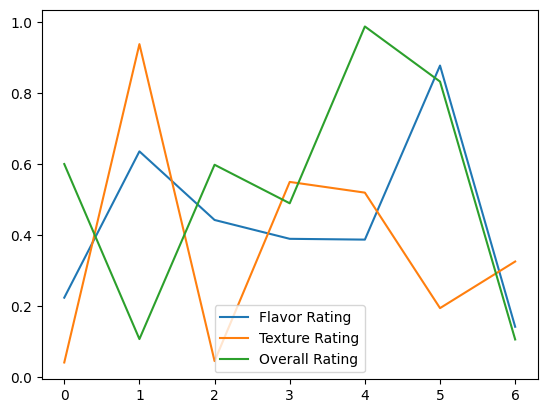

In [ ]:
# plots a line graph of all the columns if no column is specified
df.plot()

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

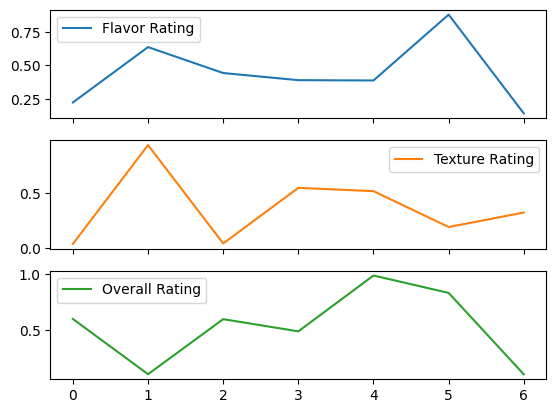

In [30]:
# breaking the line plots into subplots
df.plot(kind='line', subplots=True)

<Axes: title={'center': 'Ice Cream Ratings'}, xlabel='Daily Ratings', ylabel='Scores'>

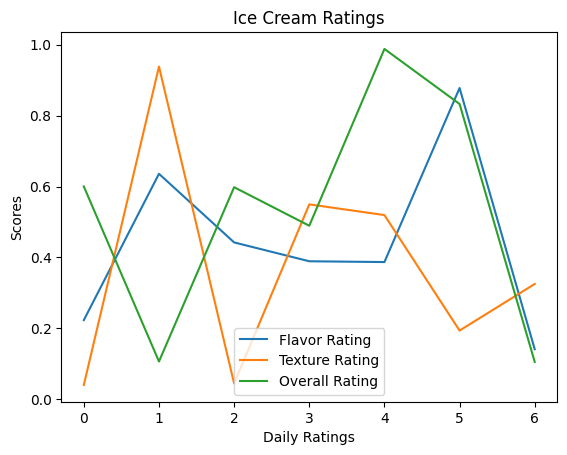

In [31]:
df.plot(kind='line', title='Ice Cream Ratings', xlabel='Daily Ratings', ylabel='Scores')

<Axes: >

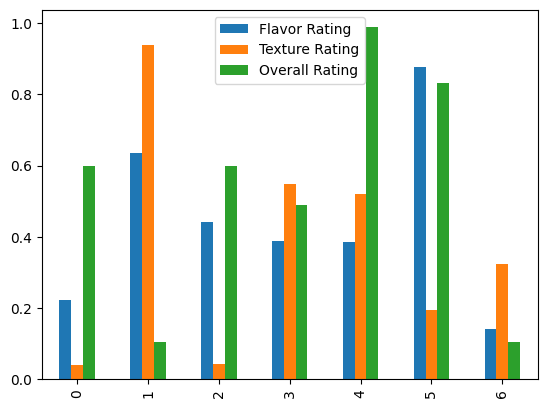

In [32]:
df.plot(kind='bar')

<Axes: >

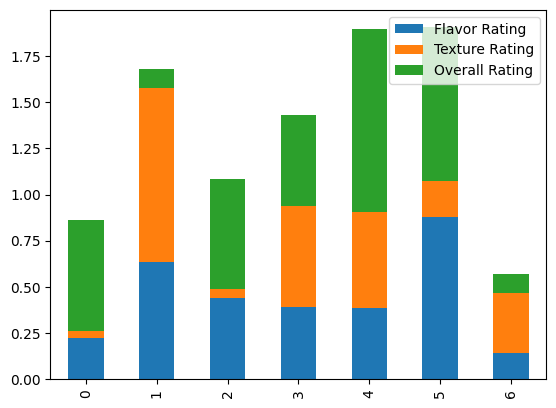

In [33]:
df.plot(kind='bar', stacked=True)

<Axes: >

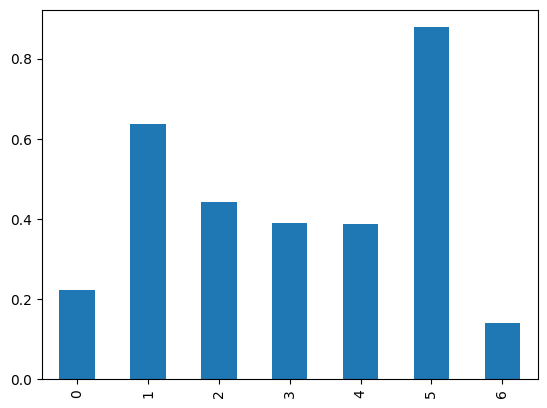

In [37]:
df['Flavor Rating'].plot(kind='bar')

<Axes: >

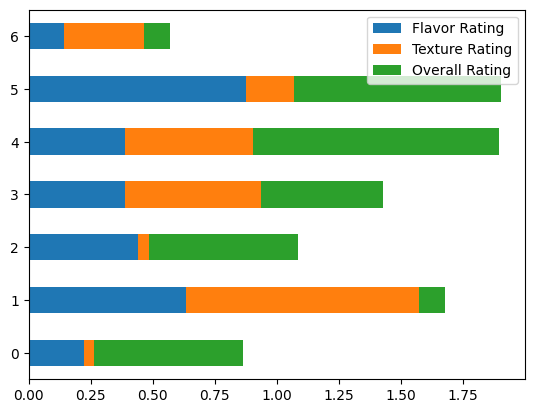

In [38]:
df.plot.barh(stacked=True)

<Axes: xlabel='Flavor Rating', ylabel='Texture Rating'>

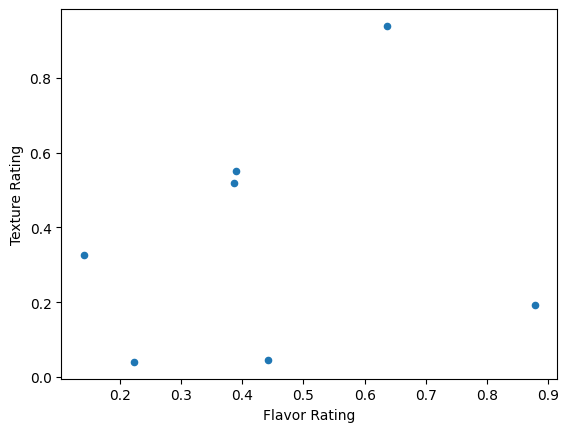

In [40]:
df.plot(kind='scatter', x='Flavor Rating', y='Texture Rating')

<Axes: xlabel='Flavor Rating', ylabel='Texture Rating'>

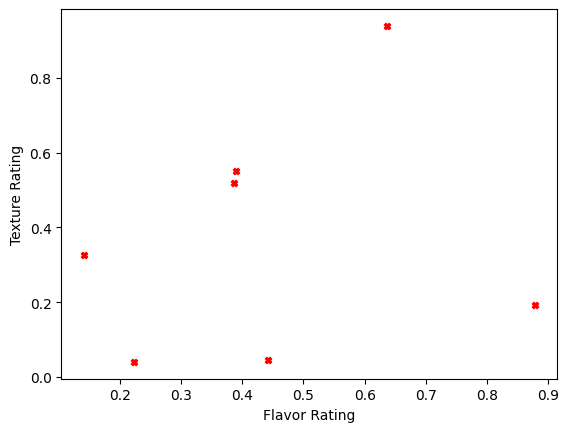

In [49]:
df.plot(kind='scatter', x='Flavor Rating', y='Texture Rating', s=20, c='red', marker='X')

<Axes: ylabel='Frequency'>

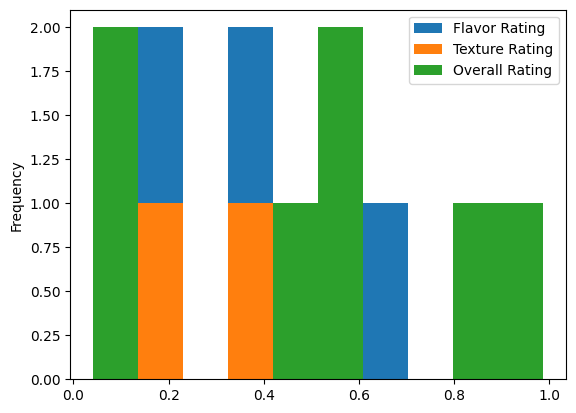

In [51]:
df.plot(kind='hist', bins=10)

<Axes: >

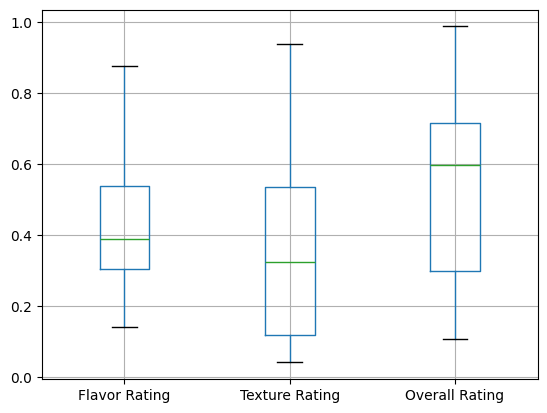

In [52]:
df.boxplot()

In [61]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: >

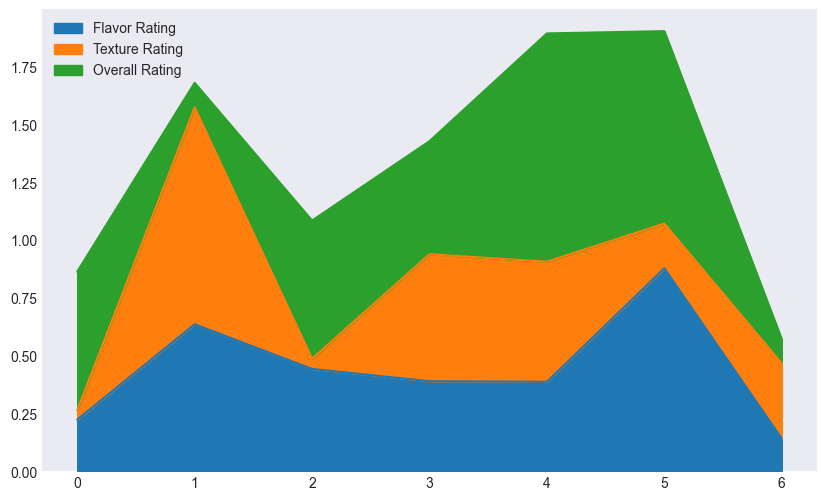

In [62]:
plt.style.use('seaborn-v0_8-dark')
df.plot.area(figsize=(10,6))

<Axes: ylabel='Flavor Rating'>

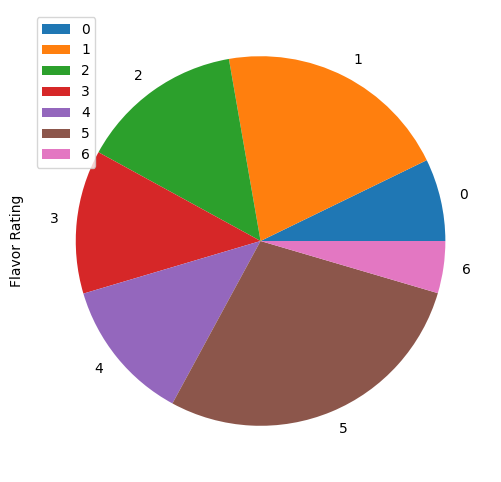

In [57]:
df.plot.pie(y='Flavor Rating', figsize=(10,6))

#### Data Cleaning in Pandas

In [63]:
import pandas as pd

In [107]:
df = pd.read_excel('Customer Call List.xlsx')
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,False
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True


In [74]:
# showing duplicate rows
df[df.duplicated()]

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
20,1020,Anakin,Skywalker,876|678|3469,"910 Tatooine Road, Tatooine",Yes,N,True


In [75]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [76]:
# Dropping unnecessary columns
df.drop(columns='Not_Useful_Column', inplace=True)
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [77]:
df['Last_Name'] = df['Last_Name'].str.strip(" ..._/")
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [88]:
df['Phone_Number'] = df['Phone_Number'].str.replace('[^a-zA-Z0-9]', '', regex=True)

df['Phone_Number'] = df['Phone_Number'].apply(lambda x: str(x))
df['Phone_Number'] = df['Phone_Number'].apply(lambda x: x[0:3] + '-' + x[3:6] + '-' + x[6:10])

df['Phone_Number'] = df['Phone_Number'].str.strip('Na --') 
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123-643-9775,93 West Main Street,No,Yes
2,1003,Walter,White,,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,,1209 South Street,No,No
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [ ]:
df[['Street_Address', 'State', 'Zip_Code']] = df['Address'].str.split(',', 2, expand=True)

In [91]:
df['Paying Customer'] = df['Paying Customer'].str.replace('Yes', 'Y')
df['Paying Customer'] = df['Paying Customer'].str.replace('No', 'N')
df['Do_Not_Contact'] = df['Do_Not_Contact'].str.replace('Yes', 'Y')
df['Do_Not_Contact'] = df['Do_Not_Contact'].str.replace('No', 'N')
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,N
1,1002,Abed,Nadir,123-643-9775,93 West Main Street,N,Y
2,1003,Walter,White,,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Y,Y
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Y,Y
6,1007,Jeff,Winger,,1209 South Street,N,N
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N
8,1009,Gandalf,NaN,,123 Middle Earth,Y,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,N


In [93]:
df = df.replace('N/a', '')
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,N
1,1002,Abed,Nadir,123-643-9775,93 West Main Street,N,Y
2,1003,Walter,White,,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Y,Y
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Y,Y
6,1007,Jeff,Winger,,1209 South Street,N,N
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N
8,1009,Gandalf,NaN,,123 Middle Earth,Y,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,N


In [94]:
df.fillna('', inplace=True)
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,N
1,1002,Abed,Nadir,123-643-9775,93 West Main Street,N,Y
2,1003,Walter,White,,298 Drugs Driveway,N,
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Y,Y
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Y,Y
6,1007,Jeff,Winger,,1209 South Street,N,N
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N
8,1009,Gandalf,,,123 Middle Earth,Y,
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,N


In [97]:
for x in df.index:
    if df.loc[x, 'Do_Not_Contact'] == 'Y':
        df.drop(x, inplace=True)

df
        

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Y,N
2,1003,Walter,White,,298 Drugs Driveway,N,
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,N
6,1007,Jeff,Winger,,1209 South Street,N,N
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,N
8,1009,Gandalf,,,123 Middle Earth,Y,
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Y,N
10,1011,Samwise,Gamgee,,"612 Shire Lane, Shire",Y,N
11,1012,Harry,Potter,,2394 Hogwarts Avenue,Y,
12,1013,Don,Draper,123-543-2345,2039 Main Street,Y,N


In [ ]:
for x in df.index:
    if df.loc[x, 'Phone_Number'] == '':
        df.drop(x, inplace=True)

df.reset_index(drop=True, inplace=True)
df